In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
iris = pd.read_csv('Iris.csv')

Now, let us check the first 5 and last 5 records from the dataset

In [3]:
iris.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.tail(5)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


# Checking for data types and the null values 

In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


as we see there are no null or missing values in our dataset
and the dataset is a balanced dataset. The Iris dataset consists of 150 data instances.

In [6]:
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

There are 3 classes(Features) - Iris Setosa,Iris Versicolor and Iris Virginica.

In [7]:
iris.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


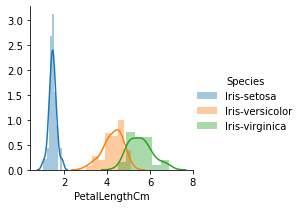

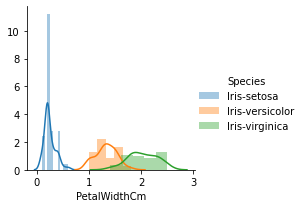

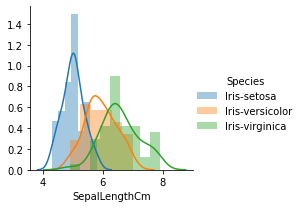

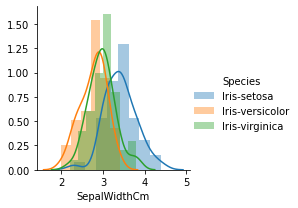

In [8]:
sns.FacetGrid(iris,hue="Species",height=3).map(sns.distplot,"PetalLengthCm").add_legend();
sns.FacetGrid(iris,hue="Species",height=3).map(sns.distplot,"PetalWidthCm").add_legend();
sns.FacetGrid(iris,hue="Species",height=3).map(sns.distplot,"SepalLengthCm").add_legend();
sns.FacetGrid(iris,hue="Species",height=3).map(sns.distplot,"SepalWidthCm").add_legend();

<Figure size 360x360 with 0 Axes>

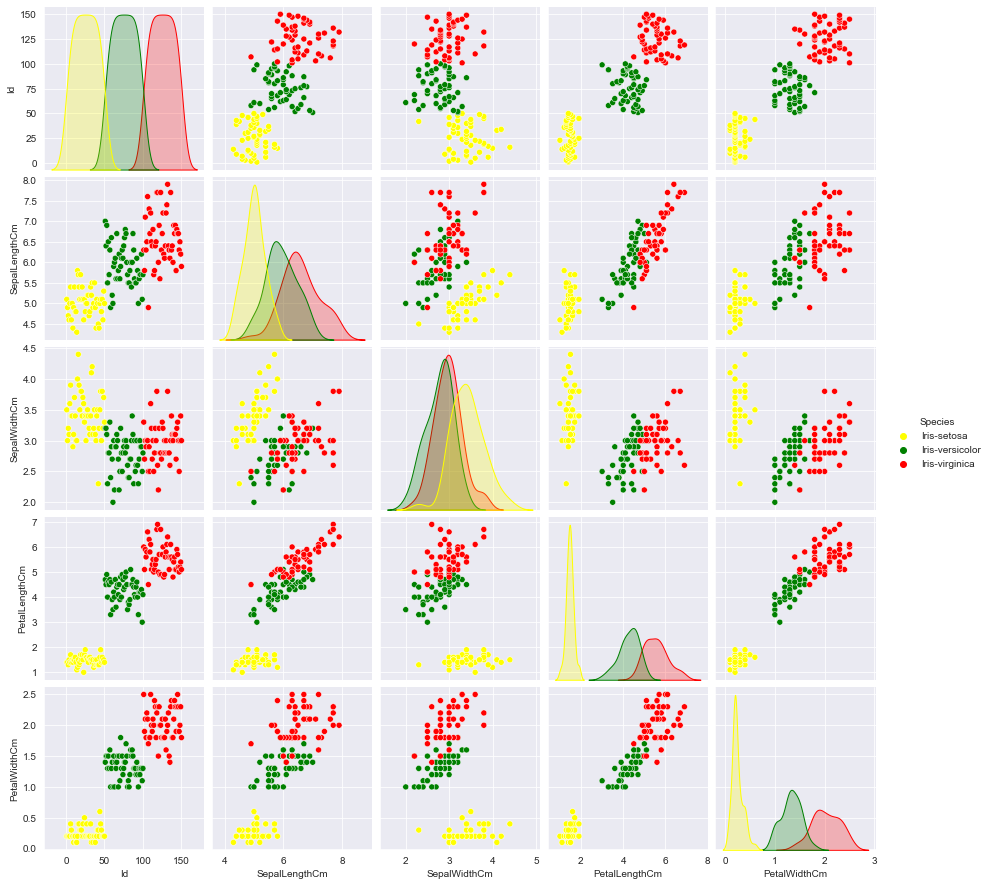

In [9]:
plt.figure(figsize=(5,5))
sns.set_style('darkgrid')
sns.pairplot(data=iris, hue='Species', palette=['yellow','green','red'])

From above plot, the following inferences can be made:

Considering sepal length & sepal width, setosa is easily seperable but versicolor & virginica have some overlap. Considering petal length & petal width, all 3 the species are quite seperable.

# Lets Run Principle Component Analysis
importing necessary libraries for PCA

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [11]:
X=iris.iloc[:,:4]

In [12]:
X

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm
0,1,5.1,3.5,1.4
1,2,4.9,3.0,1.4
2,3,4.7,3.2,1.3
3,4,4.6,3.1,1.5
4,5,5.0,3.6,1.4
...,...,...,...,...
145,146,6.7,3.0,5.2
146,147,6.3,2.5,5.0
147,148,6.5,3.0,5.2
148,149,6.2,3.4,5.4


In [13]:
#scaling our data so that none single parameter is given extra importance
X = StandardScaler().fit_transform(X)

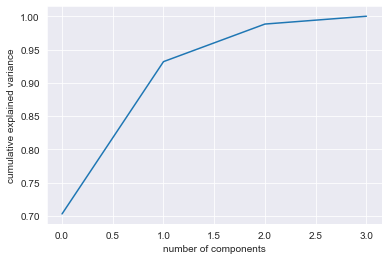

In [14]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

from the above graph We infer that 2 principle components are enough to explain our data

In [15]:
pca=PCA(n_components=3)
pca.fit(X)
print(pca.explained_variance_ratio_)

[0.70308855 0.22873259 0.05644497]


# transforming our data to principle components


In [16]:

pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2','principle component 3'])

In [17]:
principalDf.drop('principal component 2',inplace=True,axis=1)

In [18]:
target=pd.DataFrame(iris['Species'])

In [19]:
finalDf = pd.concat([principalDf, target], axis = 1)

In [20]:
finalDf

,principal component 1,principle component 3,Species
0,-2.501021,0.414614,Iris-setosa
1,-2.279945,0.564380,Iris-setosa
2,-2.559435,0.280866,Iris-setosa
3,-2.476060,0.266119,Iris-setosa
4,-2.579407,0.213151,Iris-setosa
...,...,...,...
145,1.953963,-0.554915,Iris-virginica
146,1.982991,-0.554074,Iris-virginica
147,1.854045,-0.728562,Iris-virginica
148,1.478182,-1.186842,Iris-virginica


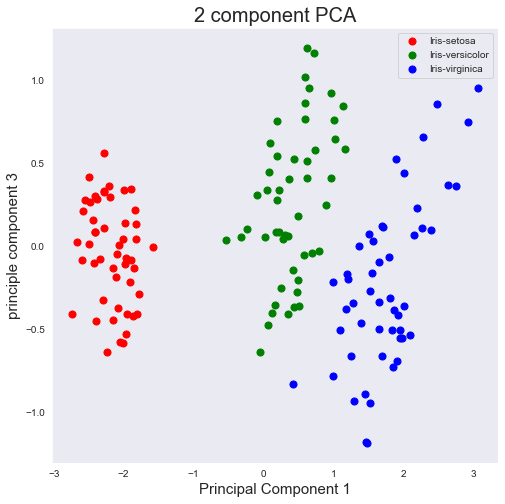

In [21]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('principle component 3', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = iris['Species'].unique()
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Species'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'], finalDf.loc[indicesToKeep, 'principle component 3'], c = color, s = 50)
ax.legend(targets)
ax.grid()

AS WE SEE now our datasets are more seperable on the basis of the princilpe components more over the issue we had initailly where versicolor & virginica have some overlap is now treated

# modeling for decission tree 

In [24]:
y_true=finalDf['Species']
Y_true=[]
for i in y_true:
    if i == 'Iris-setosa':
        Y_true.append(0)
    elif i=='Iris-versicolor':
        Y_true.append(2)
    else:
        Y_true.append(1)

In [27]:
Y_true=np.array(Y_true)

In [28]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics

splitting data into train and test

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, Y_true, test_size=0.3, random_state=8) # 70% training and 30% test


In [30]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [31]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 1.0


# So our model has predicted all the True positive values perfectly for un seen data set. 

In [32]:
#importing necessary modules
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[15,  0,  0],
       [ 0, 14,  0],
       [ 0,  0, 16]], dtype=int64)

In [35]:
print("Accuracy:",metrics.accuracy_score(y_train,clf.predict(X_train)))

Accuracy: 1.0


In [36]:
confusion_matrix(y_train,clf.predict(X_train))

array([[35,  0,  0],
       [ 0, 36,  0],
       [ 0,  0, 34]], dtype=int64)

# the above confusion matrixes shows that our model is perfectly trained on the without any misclassification and is behaving the same for the unseen data or the test data
